# Example Post Processing 
This will show how to do some basic post processing on the output of ssocr-video.py. this is needed because some artifacts can show up in the data due to the refresh rate on LCD screens beeing longer than the video frame rate.

First, we will use pandas to do our processing

In [1]:
import pandas as pd

Next we will load in the data

In [2]:
df=pd.read_csv("data/output.csv")

Lets look at a initial plot of the data

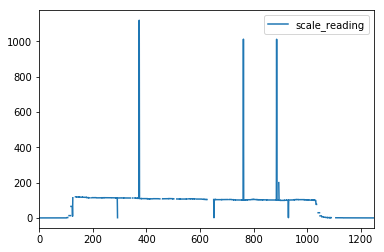

In [4]:
df.plot(y="scale_reading")

As you will probably see there are some extreme values and some missing values. We will first fill in the NA values using a backfill method. This makes sense since most of the NA values happen in the middle of the LCD screen refresh.

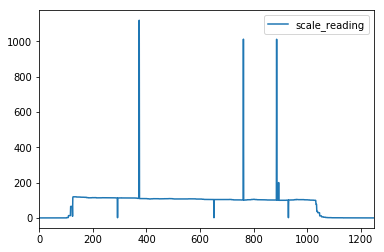

In [5]:
df_filled=df.fillna(method="backfill")
df_filled.plot(y="scale_reading")

Next we will remove the extreme values

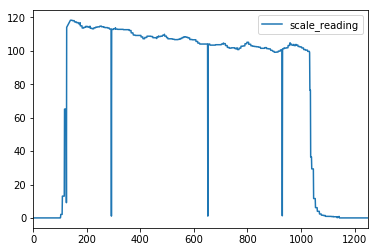

In [6]:
q = df_filled["scale_reading"].quantile(0.99)
df_clean=df_filled[df_filled["scale_reading"] < q]
df_clean.plot(y="scale_reading")

There are still some spikes in the data. We will next use a running median filter to remove those values. We will use a window length of 3 since the extremes values are very transient but you could increase the window size if needed. 

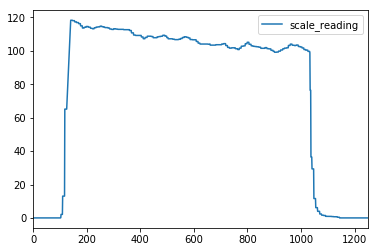

In [7]:
df_smoothed=df_clean.rolling(3).median()
df_smoothed.plot(y="scale_reading")